# COMP293A Final Project: Game Review Data Analysis

Prabhleen Gill, Fall 2025

## Abstract

User-generated reviews play a major role in shaping consumer decisions on digital platforms. Understanding what linguistic features distinguish positive reviews from negative reviews is essential for developing effective marketing strategies as well as recommendation systems. In this project, a dataset of Steam game reviews was analyzed to examine how writing characteristics, such as word count, average word length, stopword usage, and readability index, relate to the sentiment of reviews. After extensive data cleaning and feature engineering, exploratory data analysis revealed clear differences in writing patterns. Negative reviews were longer and more descriptive while positive reviews were shorter and more direct. Negative reviews were less readable and more complex linguistically. The results demonstrated that writing style, length, and linguistic complexity are associated with review sentiment, providing insight into how gamers communciate their experiences and emotions in written form.  

## Introduction

For companies around the world, understanding the emotions and deeper sentiments of customer reviews is critical. The success of businesses relies heavily on customer satisfaction, so marketing teams must develop strategies using this information to broaden the appeal of their customers. Steam, one of the largest gaming platforms, hosts million of user reviews that influence purchasing decisions and perceptions about games. These reviews vary widely in writing style, lenth, and emotional tone, making sentiment analysis an important tool for uncovering underlying patterns. In this project, a dataset of Steam game reviews is analyzed to identify different writing characteristics such as word count, readability, stopword usage, and complexity to label sentiment. The goal of this project is to explore what linguistic features of these reviews are most strongly associated with positive or negative sentiment, which can help in providing insight into how gamers communicate their experiences and offering a foundation for building more effective sentiment classification.

## Methodology

The dataset used for this project was "Steam Reviews&Games Dataset" from Kaggle. It contained 201,151 reviews, and there were five features: review id, game id, content, author id, and sentiment label. For data cleaning, the id columns were dropped and reviews with missing values were removed. Additionally, the content was cleaned by removing extra spaces and symbols as well as dropping URLs and converting the text to lower case. This cleaned text was stored into a separate column and was also tokenized. For feature engineering, the numeric columns that were created throughout this project were character count, word count, average word length, stopwords count, stopwords ratio, sentiment score, and readability index. Some of these features were visualized individually as well as with other features for comparison. For deeper comparison, some visualizations separated these features by their sentiment label. Histograms, boxplots, scatterplots, and lineplots were the commonly used visual representations for these features. A correlation heatmap was also created to compare the correlations of these numeric columns. Basic statistics of these features were obtained using the describe method, and were used as a baseline for interpreting the visualizations and comparing features.

This project was developed in Jupyter Notebook. Pandas was used for storing and manipulating the data. Numpy was used for minor mathematical operations. Matplotlib and Seaborn were used for visualizing the data. RegEx was used in data cleaning feature engineering for identifying specific substrings or characters in reviews. Collections was used to access the Counter tool for counting stopwords. NLTK was used to access VADER, the tool used for sentiment score. TextStat was used for obtaining readability indices. 

## Final Product

In [262]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
# Load dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("filipkin/steam-reviews")

print("Path to dataset files:", path)

Path to dataset files: /Users/prabhleengill/.cache/kagglehub/datasets/filipkin/steam-reviews/versions/6


In [118]:
# Read dataset
df = pd.read_csv(f"{path}/output.csv")

In [119]:
df.shape

(201151, 5)

In [120]:
df.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


In [121]:
df.tail()

,id,app_id,content,author_id,is_positive
201146,118775009,570,This trash for sick anime clowns!,76561198393884121,Negative
201147,118771828,570,Not noob friendly,76561198077888096,Negative
201148,118771331,570,Total trash for anime clowns!,76561198819460083,Negative
201149,182234883,730,Unplayable. It keeps trying to update but then...,76561198084125683,Negative
201150,177842193,730,Bring back csgo,76561199392883256,Negative


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           201151 non-null  int64 
 1   app_id       201151 non-null  int64 
 2   content      200723 non-null  object
 3   author_id    201151 non-null  int64 
 4   is_positive  201151 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.7+ MB


In [123]:
df.nunique()

id             201151
app_id             50
content        168928
author_id      173886
is_positive         2
dtype: int64

In [124]:
df.isnull().sum()

id               0
app_id           0
content        428
author_id        0
is_positive      0
dtype: int64

### Data Preparation & Cleaning

In [125]:
# drop id columns
df = df.drop(['author_id', 'app_id', 'id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201151 entries, 0 to 201150
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   content      200723 non-null  object
 1   is_positive  201151 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [126]:
# Handle missing/incorrect data
df = df.dropna()
df.isnull().sum()

content        0
is_positive    0
dtype: int64

In [127]:
# cleaning content
import unicodedata

def clean_text(text):
    text = str(text)
    text = unicodedata.normalize("NFKD", text) # normalize unicode
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = text.lower() # lower case text
    text = re.sub(r"http\S+", " ", text) # remove URLs
    text = text.replace('"', ' ').replace("'", " ") # remove leftover quotes
    text = re.sub(r"[^a-zA-ZÀ-ÿ0-9\s.,!?]", " ", text) # remove extra characters
    text = re.sub(r"\s+", " ", text).strip() # remove extra spaces
    return text

In [128]:
df['clean_content'] = df['content'].apply(clean_text)
df = df[df['clean_content'].str.count(r'[a-zA-Z]') > 5]
df = df.reset_index(drop=True)

In [129]:
df.head()

,content,is_positive,clean_content
0,At least its a counter strike -1/100,Negative,at least its a counter strike 1 100
1,Uh... So far my playthrough has not been great...,Negative,uh... so far my playthrough has not been great...
2,Better mechanics than cs2,Negative,better mechanics than cs2
3,buggy mess and NOT fun to play at all,Negative,buggy mess and not fun to play at all
4,"Whoever came up with this, is gonna fucking ge...",Negative,"whoever came up with this, is gonna fucking ge..."


In [130]:
# Remove punctuations
df['clean_no_punct'] = df['clean_content'].apply(lambda x: re.sub(r'[^a-zA-ZÀ-ÿ0-9\s]', ' ', x))

In [131]:
df.head()

,content,is_positive,clean_content,clean_no_punct
0,At least its a counter strike -1/100,Negative,at least its a counter strike 1 100,at least its a counter strike 1 100
1,Uh... So far my playthrough has not been great...,Negative,uh... so far my playthrough has not been great...,uh so far my playthrough has not been great...
2,Better mechanics than cs2,Negative,better mechanics than cs2,better mechanics than cs2
3,buggy mess and NOT fun to play at all,Negative,buggy mess and not fun to play at all,buggy mess and not fun to play at all
4,"Whoever came up with this, is gonna fucking ge...",Negative,"whoever came up with this, is gonna fucking ge...",whoever came up with this is gonna fucking ge...


In [132]:
# tokenize clean_no_punct

df['tokens'] = df['clean_no_punct'].str.split()

In [133]:
df.head()

,content,is_positive,clean_content,clean_no_punct,tokens
0,At least its a counter strike -1/100,Negative,at least its a counter strike 1 100,at least its a counter strike 1 100,"[at, least, its, a, counter, strike, 1, 100]"
1,Uh... So far my playthrough has not been great...,Negative,uh... so far my playthrough has not been great...,uh so far my playthrough has not been great...,"[uh, so, far, my, playthrough, has, not, been,..."
2,Better mechanics than cs2,Negative,better mechanics than cs2,better mechanics than cs2,"[better, mechanics, than, cs2]"
3,buggy mess and NOT fun to play at all,Negative,buggy mess and not fun to play at all,buggy mess and not fun to play at all,"[buggy, mess, and, not, fun, to, play, at, all]"
4,"Whoever came up with this, is gonna fucking ge...",Negative,"whoever came up with this, is gonna fucking ge...",whoever came up with this is gonna fucking ge...,"[whoever, came, up, with, this, is, gonna, fuc..."


In [134]:
# Add features
# char_count: number of characters in content

df['char_count'] = df['content'].str.len()

In [135]:
df.head()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count
0,At least its a counter strike -1/100,Negative,at least its a counter strike 1 100,at least its a counter strike 1 100,"[at, least, its, a, counter, strike, 1, 100]",36
1,Uh... So far my playthrough has not been great...,Negative,uh... so far my playthrough has not been great...,uh so far my playthrough has not been great...,"[uh, so, far, my, playthrough, has, not, been,...",230
2,Better mechanics than cs2,Negative,better mechanics than cs2,better mechanics than cs2,"[better, mechanics, than, cs2]",25
3,buggy mess and NOT fun to play at all,Negative,buggy mess and not fun to play at all,buggy mess and not fun to play at all,"[buggy, mess, and, not, fun, to, play, at, all]",37
4,"Whoever came up with this, is gonna fucking ge...",Negative,"whoever came up with this, is gonna fucking ge...",whoever came up with this is gonna fucking ge...,"[whoever, came, up, with, this, is, gonna, fuc...",76


In [136]:
# word_count: number of words in content
df['word_count'] = df['content'].str.split().str.len()

In [137]:
df.head()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count
0,At least its a counter strike -1/100,Negative,at least its a counter strike 1 100,at least its a counter strike 1 100,"[at, least, its, a, counter, strike, 1, 100]",36,7
1,Uh... So far my playthrough has not been great...,Negative,uh... so far my playthrough has not been great...,uh so far my playthrough has not been great...,"[uh, so, far, my, playthrough, has, not, been,...",230,42
2,Better mechanics than cs2,Negative,better mechanics than cs2,better mechanics than cs2,"[better, mechanics, than, cs2]",25,4
3,buggy mess and NOT fun to play at all,Negative,buggy mess and not fun to play at all,buggy mess and not fun to play at all,"[buggy, mess, and, not, fun, to, play, at, all]",37,9
4,"Whoever came up with this, is gonna fucking ge...",Negative,"whoever came up with this, is gonna fucking ge...",whoever came up with this is gonna fucking ge...,"[whoever, came, up, with, this, is, gonna, fuc...",76,14


In [138]:
# avg_word_length: average length of words in content
df['avg_word_length'] = df['clean_content'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [139]:
df.tail()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count,avg_word_length
174865,This trash for sick anime clowns!,Negative,this trash for sick anime clowns!,this trash for sick anime clowns,"[this, trash, for, sick, anime, clowns]",33,6,4.666667
174866,Not noob friendly,Negative,not noob friendly,not noob friendly,"[not, noob, friendly]",17,3,5.000000
174867,Total trash for anime clowns!,Negative,total trash for anime clowns!,total trash for anime clowns,"[total, trash, for, anime, clowns]",29,5,5.000000
174868,Unplayable. It keeps trying to update but then...,Negative,unplayable. it keeps trying to update but then...,unplayable it keeps trying to update but then...,"[unplayable, it, keeps, trying, to, update, bu...",732,123,4.592308
174869,Bring back csgo,Negative,bring back csgo,bring back csgo,"[bring, back, csgo]",15,3,4.333333


### Word Analysis

In [113]:
# download stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prabhleengill/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
df['stopwords_count'] = df['tokens'].apply(lambda x: sum(w in stop for w in x))
df['stopwords_ratio'] = df['stopwords_count']/df['word_count']

In [150]:
df.tail()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count,avg_word_length,stopwords_count,stopwords_ratio
174865,This trash for sick anime clowns!,Negative,this trash for sick anime clowns!,this trash for sick anime clowns,"[this, trash, for, sick, anime, clowns]",33,6,4.666667,2,0.333333
174866,Not noob friendly,Negative,not noob friendly,not noob friendly,"[not, noob, friendly]",17,3,5.000000,1,0.333333
174867,Total trash for anime clowns!,Negative,total trash for anime clowns!,total trash for anime clowns,"[total, trash, for, anime, clowns]",29,5,5.000000,1,0.200000
174868,Unplayable. It keeps trying to update but then...,Negative,unplayable. it keeps trying to update but then...,unplayable it keeps trying to update but then...,"[unplayable, it, keeps, trying, to, update, bu...",732,123,4.592308,61,0.495935
174869,Bring back csgo,Negative,bring back csgo,bring back csgo,"[bring, back, csgo]",15,3,4.333333,0,0.000000


In [140]:
# count which stopwords occur most frequently in tokens
from collections import Counter

all_words = [w for review in df['tokens'] for w in review]

stop_words = [w for w in all_words for w in stop]

common_stopwords = Counter(stop_words).most_common(20)
common_stopwords

[('any', 5111506),
 ("should've", 5111506),
 ('all', 5111506),
 ("haven't", 5111506),
 ('whom', 5111506),
 ('yourself', 5111506),
 ('not', 5111506),
 ("don't", 5111506),
 ('on', 5111506),
 ('so', 5111506),
 ("couldn't", 5111506),
 ('doesn', 5111506),
 ('ourselves', 5111506),
 ('for', 5111506),
 ('he', 5111506),
 ('hasn', 5111506),
 ('my', 5111506),
 ('more', 5111506),
 ('shan', 5111506),
 ('there', 5111506)]

In [144]:
# counter for positive reviews
pos_words = [w for review in df[df['is_positive'] == "Positive"]['tokens'] for w in review if w in stop]

pos_stopwords = Counter(pos_words).most_common(20)
pos_stopwords

[('the', 83051),
 ('a', 53434),
 ('and', 49945),
 ('it', 49268),
 ('i', 45094),
 ('to', 43017),
 ('of', 37441),
 ('is', 35246),
 ('this', 33126),
 ('you', 29813),
 ('in', 22322),
 ('s', 21016),
 ('but', 19944),
 ('for', 19144),
 ('that', 17583),
 ('with', 16955),
 ('on', 11615),
 ('as', 11143),
 ('t', 11096),
 ('if', 10955)]

In [145]:
# counter for negative reviews
neg_words = [w for review in df[df['is_positive'] == "Negative"]['tokens'] for w in review if w in stop]

neg_stopwords = Counter(neg_words).most_common(20)
neg_stopwords

[('the', 115012),
 ('and', 70311),
 ('to', 70210),
 ('i', 65569),
 ('a', 59559),
 ('it', 58493),
 ('this', 51356),
 ('of', 49270),
 ('is', 48317),
 ('you', 42257),
 ('in', 31673),
 ('for', 27459),
 ('that', 27129),
 ('t', 24386),
 ('but', 23093),
 ('not', 22290),
 ('with', 21676),
 ('s', 21535),
 ('are', 17205),
 ('on', 16625)]

In [151]:
# frequency of non-stopwords
df['nonstopwords_count'] = df['tokens'].apply(lambda x: sum(w not in stop for w in x))
df['nonstopwords'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop])

In [152]:
df.tail()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count,avg_word_length,stopwords_count,stopwords_ratio,nonstopwords_count,nonstopwords
174865,This trash for sick anime clowns!,Negative,this trash for sick anime clowns!,this trash for sick anime clowns,"[this, trash, for, sick, anime, clowns]",33,6,4.666667,2,0.333333,4,"[trash, sick, anime, clowns]"
174866,Not noob friendly,Negative,not noob friendly,not noob friendly,"[not, noob, friendly]",17,3,5.000000,1,0.333333,2,"[noob, friendly]"
174867,Total trash for anime clowns!,Negative,total trash for anime clowns!,total trash for anime clowns,"[total, trash, for, anime, clowns]",29,5,5.000000,1,0.200000,4,"[total, trash, anime, clowns]"
174868,Unplayable. It keeps trying to update but then...,Negative,unplayable. it keeps trying to update but then...,unplayable it keeps trying to update but then...,"[unplayable, it, keeps, trying, to, update, bu...",732,123,4.592308,61,0.495935,67,"[unplayable, keeps, trying, update, immediatel..."
174869,Bring back csgo,Negative,bring back csgo,bring back csgo,"[bring, back, csgo]",15,3,4.333333,0,0.000000,3,"[bring, back, csgo]"


In [153]:
# count non-stopwords
non_stopwords_list = [w for review in df['nonstopwords'] for w in review]

non_stopwords = Counter(non_stopwords_list).most_common(20)
non_stopwords

[('game', 133502),
 ('play', 29957),
 ('good', 26084),
 ('life', 24244),
 ('like', 23300),
 ('half', 21538),
 ('fun', 20385),
 ('valve', 18649),
 ('get', 17390),
 ('one', 16522),
 ('2', 16469),
 ('time', 16012),
 ('still', 14243),
 ('10', 14237),
 ('games', 13879),
 ('even', 13272),
 ('playing', 11699),
 ('really', 11660),
 ('bots', 11636),
 ('great', 10977)]

In [156]:
# count non-stopwords for positive
pos_nonstopwords_list = [w for review in df[df['is_positive'] == 'Positive']['nonstopwords'] for w in review]

pos_nonstopwords = Counter(pos_nonstopwords_list).most_common(20)
pos_nonstopwords

[('game', 54736),
 ('good', 17223),
 ('life', 15052),
 ('fun', 14015),
 ('half', 13872),
 ('play', 12750),
 ('like', 10341),
 ('10', 9574),
 ('still', 8535),
 ('one', 8269),
 ('great', 7815),
 ('2', 7811),
 ('best', 7628),
 ('time', 6347),
 ('get', 6214),
 ('games', 5974),
 ('really', 5858),
 ('playing', 5068),
 ('better', 4988),
 ('played', 4855)]

In [157]:
# count non-stopwords for negative
neg_nonstopwords_list = [w for review in df[df['is_positive'] == 'Negative']['nonstopwords'] for w in review]

neg_nonstopwords = Counter(neg_nonstopwords_list).most_common(20)
neg_nonstopwords

[('game', 78766),
 ('play', 17207),
 ('valve', 15077),
 ('like', 12959),
 ('get', 11176),
 ('bots', 10800),
 ('time', 9665),
 ('life', 9192),
 ('even', 9176),
 ('good', 8861),
 ('2', 8658),
 ('fix', 8338),
 ('one', 8253),
 ('games', 7905),
 ('half', 7666),
 ('shit', 6806),
 ('playing', 6631),
 ('bad', 6599),
 ('people', 6426),
 ('fun', 6370)]

In [194]:
# get sentiment scores using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['clean_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/prabhleengill/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [195]:
df.tail()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count,avg_word_length,stopwords_count,stopwords_ratio,nonstopwords_count,nonstopwords,sentiment_score
174865,This trash for sick anime clowns!,Negative,this trash for sick anime clowns!,this trash for sick anime clowns,"[this, trash, for, sick, anime, clowns]",33,6,4.666667,2,0.333333,4,"[trash, sick, anime, clowns]",-0.5562
174866,Not noob friendly,Negative,not noob friendly,not noob friendly,"[not, noob, friendly]",17,3,5.000000,1,0.333333,2,"[noob, friendly]",-0.3570
174867,Total trash for anime clowns!,Negative,total trash for anime clowns!,total trash for anime clowns,"[total, trash, for, anime, clowns]",29,5,5.000000,1,0.200000,4,"[total, trash, anime, clowns]",0.0000
174868,Unplayable. It keeps trying to update but then...,Negative,unplayable. it keeps trying to update but then...,unplayable it keeps trying to update but then...,"[unplayable, it, keeps, trying, to, update, bu...",732,123,4.592308,61,0.495935,67,"[unplayable, keeps, trying, update, immediatel...",-0.3649
174869,Bring back csgo,Negative,bring back csgo,bring back csgo,"[bring, back, csgo]",15,3,4.333333,0,0.000000,3,"[bring, back, csgo]",0.0000


In [217]:
# get readibility index
from textstat import flesch_reading_ease

df['readability_index'] = df['clean_content'].apply(lambda x: flesch_reading_ease(x))

In [218]:
df.tail()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count,avg_word_length,stopwords_count,stopwords_ratio,nonstopwords_count,nonstopwords,sentiment_score,word_bin,readability_index
174865,This trash for sick anime clowns!,Negative,this trash for sick anime clowns!,this trash for sick anime clowns,"[this, trash, for, sick, anime, clowns]",33,6,4.666667,2,0.333333,4,"[trash, sick, anime, clowns]",-0.5562,0-20,102.045000
174866,Not noob friendly,Negative,not noob friendly,not noob friendly,"[not, noob, friendly]",17,3,5.000000,1,0.333333,2,"[noob, friendly]",-0.3570,0-20,90.990000
174867,Total trash for anime clowns!,Negative,total trash for anime clowns!,total trash for anime clowns,"[total, trash, for, anime, clowns]",29,5,5.000000,1,0.200000,4,"[total, trash, anime, clowns]",0.0000,0-20,83.320000
174868,Unplayable. It keeps trying to update but then...,Negative,unplayable. it keeps trying to update but then...,unplayable it keeps trying to update but then...,"[unplayable, it, keeps, trying, to, update, bu...",732,123,4.592308,61,0.495935,67,"[unplayable, keeps, trying, update, immediatel...",-0.3649,101-200,70.247688
174869,Bring back csgo,Negative,bring back csgo,bring back csgo,"[bring, back, csgo]",15,3,4.333333,0,0.000000,3,"[bring, back, csgo]",0.0000,0-20,90.990000


### EDA & Visualization

In [345]:
# Compute statistics for numeric columns
df.describe()

,char_count,word_count,avg_word_length,stopwords_count,stopwords_ratio,nonstopwords_count,sentiment_score,readability_index,sentiment_no_stopwords
count,174870.000000,174870.000000,174870.000000,174870.000000,174870.000000,174870.000000,174870.000000,174870.000000,174870.000000
mean,158.849322,28.648202,4.965143,13.291308,0.366447,15.939012,0.134291,73.685759,0.163693
std,491.451646,69.842879,47.094560,34.221755,0.375081,38.880371,0.537599,1216.763294,0.520782
min,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-477022.780000,-1.000000
25%,21.000000,4.000000,3.750000,1.000000,0.250000,3.000000,-0.273200,68.819265,-0.128000
50%,51.000000,10.000000,4.170455,4.000000,0.409091,6.000000,0.000000,83.674143,0.077200
75%,134.000000,25.000000,4.666667,12.000000,0.500000,14.000000,0.624900,100.240000,0.624900
max,120000.000000,2105.000000,8000.000000,1263.000000,128.000000,2000.000000,1.000000,162.505000,1.000000


In [50]:
df.groupby('is_positive')['char_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,186.957233,603.124409,6.0,24.0,60.0,166.0,120000.0
Positive,88471.0,131.399702,347.319509,6.0,19.0,44.0,107.0,8000.0


In [51]:
df.groupby('is_positive')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,33.638005,77.958964,1.0,5.0,11.0,31.0,1880.0
Positive,88471.0,23.775260,60.485899,1.0,4.0,8.0,20.0,2105.0


In [52]:
df.groupby('is_positive')['avg_word_length'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,5.081277,53.683651,1.0,3.818182,4.222222,4.666667,7921.0
Positive,88471.0,4.851730,39.615802,1.0,3.692308,4.114754,4.666667,8000.0


In [191]:
df.groupby('is_positive')['stopwords_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,15.927569,38.698793,0.0,1.0,5.0,14.0,940.0
Positive,88471.0,10.716789,28.963845,0.0,1.0,3.0,9.0,1263.0


In [192]:
df.groupby('is_positive')['stopwords_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,0.379533,0.213170,0.0,0.25,0.426136,0.515152,9.0
Positive,88471.0,0.353667,0.483084,0.0,0.20,0.400000,0.500000,128.0


In [193]:
df.groupby('is_positive')['nonstopwords_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,18.442135,43.049555,0.0,3.0,7.0,17.0,1600.0
Positive,88471.0,13.494512,34.147105,0.0,3.0,5.0,11.0,2000.0


In [208]:
df.groupby('is_positive')['sentiment_score'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,-0.099084,0.521561,-1.0,-0.5423,0.0000,0.2732,1.0
Positive,88471.0,0.362200,0.447743,-1.0,0.0000,0.4404,0.7269,1.0


In [228]:
df.groupby('is_positive')['readability_index'].describe()

,count,mean,std,min,25%,50%,75%,max
is_positive,,,,,,,,
Negative,86399.0,70.232788,1647.274384,-477022.78,67.226581,81.991638,97.025,162.505
Positive,88471.0,77.057861,525.722326,-135238.78,70.507045,85.952971,102.045,162.505


<Axes: title={'center': 'Character Count of Reviews'}, xlabel='Number of Characters', ylabel='Number of Reviews'>

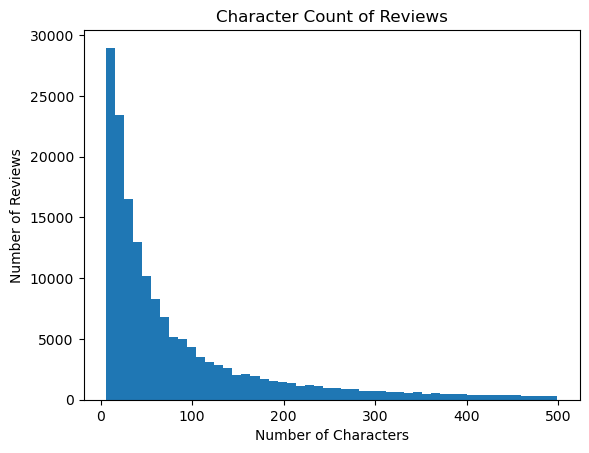

In [79]:
# histogram for char_count
df[df['char_count'] < 500]['char_count'].plot(kind='hist', bins=50, title='Character Count of Reviews', xlabel='Number of Characters', ylabel='Number of Reviews')

<Axes: title={'center': 'Word Count of Reviews'}, xlabel='Number of Words', ylabel='Number of Reviews'>

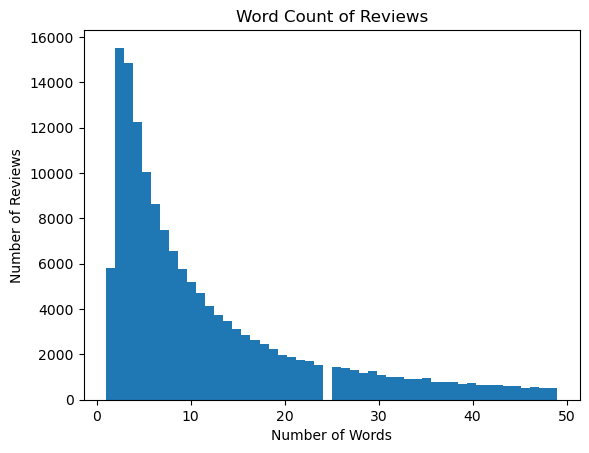

In [71]:
# histogram for word_count
df[df['word_count'] < 50]['word_count'].plot(kind='hist', bins=50, title='Word Count of Reviews', xlabel='Number of Words', ylabel='Number of Reviews')

<Axes: title={'center': 'Average Word Length of Reviews'}, xlabel='Average Value', ylabel='Number of Reviews'>

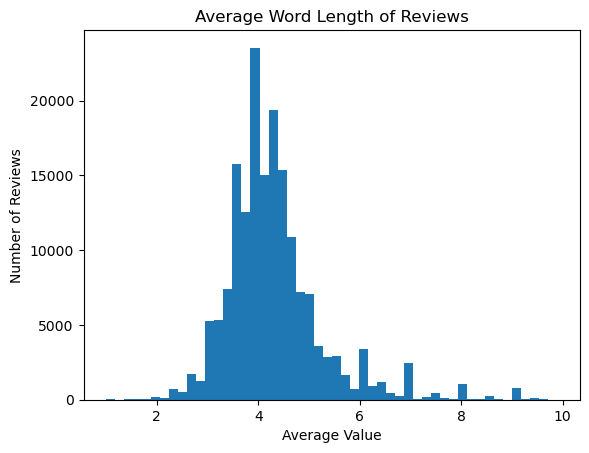

In [75]:
# histogram for avg_word_length
df[df['avg_word_length'] < 10]['avg_word_length'].plot(kind='hist', bins=50, title='Average Word Length of Reviews', xlabel='Average Value', ylabel='Number of Reviews')

<Axes: xlabel='is_positive', ylabel='char_count'>

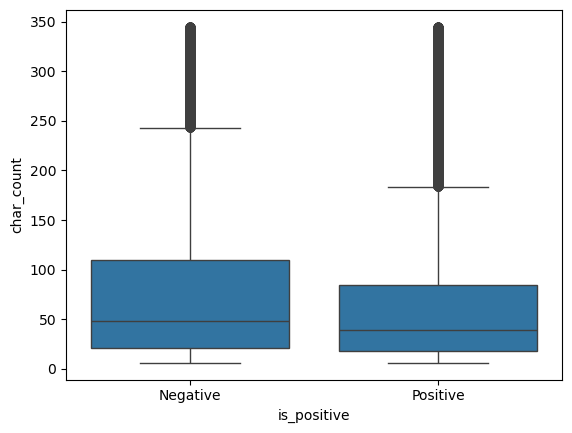

In [93]:
# boxplot for char_count by is_positive
df_trim = df[df['char_count'] < df['char_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='char_count')

<Axes: xlabel='is_positive', ylabel='word_count'>

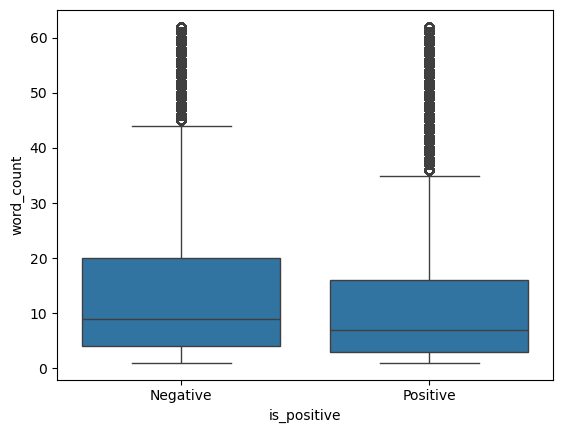

In [98]:
# boxplot for word_count by is_positive
df_trim = df[df['word_count'] < df['word_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='word_count')

<Axes: xlabel='is_positive', ylabel='avg_word_length'>

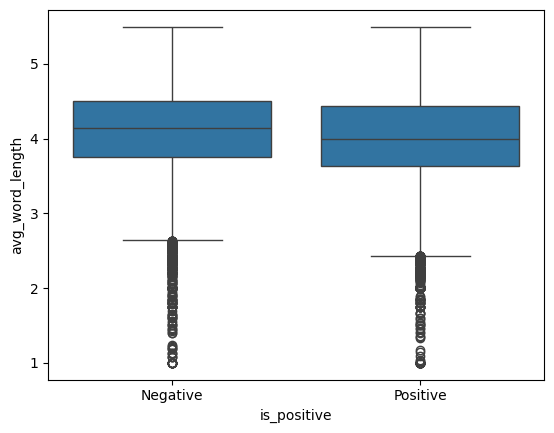

In [101]:
# boxplot for avg_word_length by is_positive
df_trim = df[df['avg_word_length'] < df['avg_word_length'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='avg_word_length')

<Axes: >

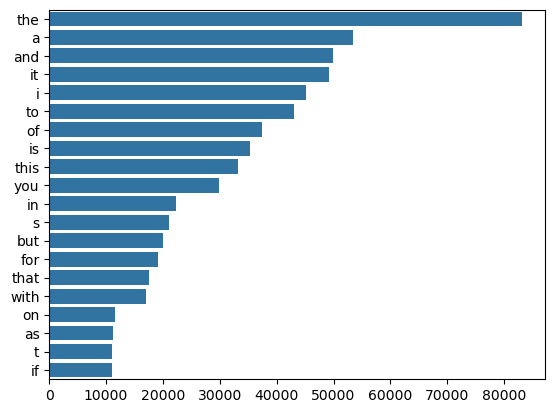

In [147]:
# visualize pos_stopwords
words, counts = zip(*pos_stopwords)
sns.barplot(x=list(counts), y=list(words))

<Axes: >

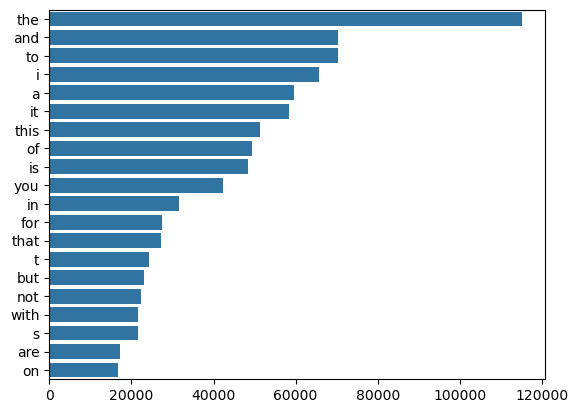

In [148]:
# visualize neg_stopwords
words, counts = zip(*neg_stopwords)
sns.barplot(x=list(counts), y=list(words))

<Axes: >

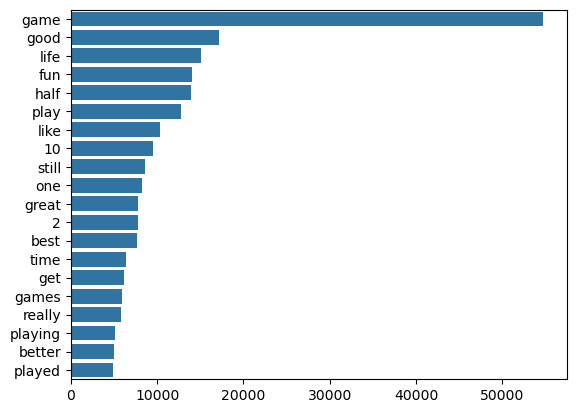

In [158]:
# visualize pos_nonstopwords
words, counts = zip(*pos_nonstopwords)
sns.barplot(x=list(counts), y=list(words))

<Axes: >

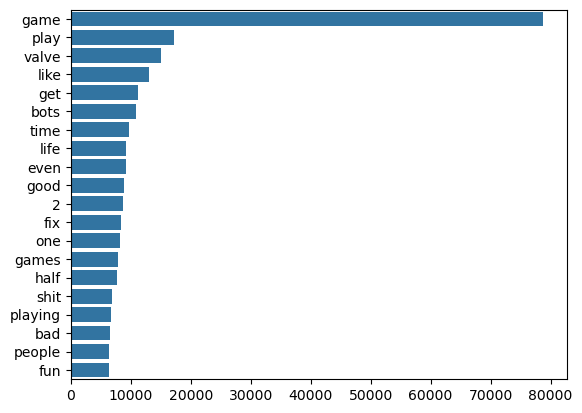

In [159]:
# visualize neg_nonstopwords
words, counts = zip(*neg_nonstopwords)
sns.barplot(x=list(counts), y=list(words))

<Axes: title={'center': 'Stopword Count of Reviews'}, xlabel='Number of Stopwords', ylabel='Number of Reviews'>

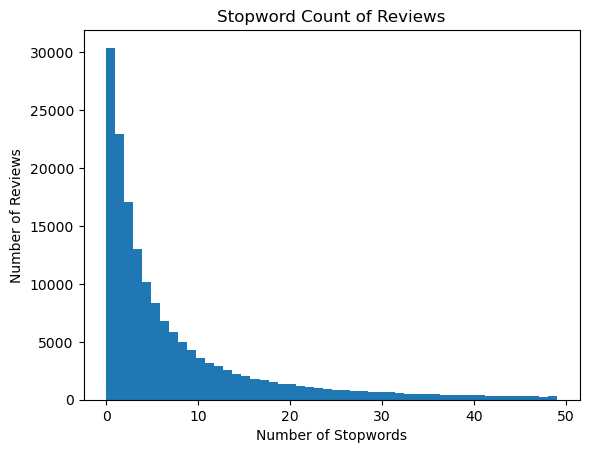

In [171]:
# histogram for stopwords_count
df[df['stopwords_count'] < 50]['stopwords_count'].plot(kind='hist', bins=50, title='Stopword Count of Reviews', xlabel='Number of Stopwords', ylabel='Number of Reviews')

<Axes: title={'center': 'Non-Stopword Count of Reviews'}, xlabel='Number of Non-Stopwords', ylabel='Number of Reviews'>

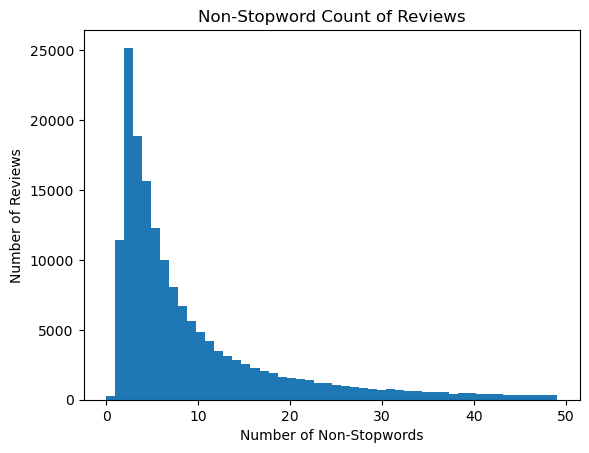

In [178]:
# histogram for nonstopwords_count
df[df['nonstopwords_count'] < 50]['nonstopwords_count'].plot(kind='hist', bins=50, title='Non-Stopword Count of Reviews', xlabel='Number of Non-Stopwords', ylabel='Number of Reviews')

<Axes: title={'center': 'Stopword Ratio of Reviews'}, xlabel='Ratio Value', ylabel='Number of Reviews'>

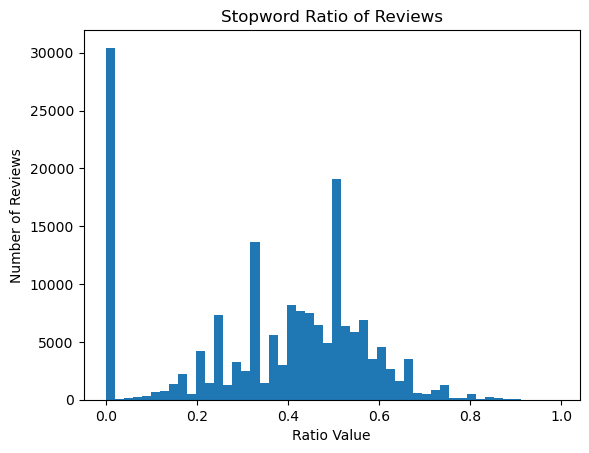

In [186]:
# histogram for stopwords_ratio
df[df['stopwords_ratio'] < 1]['stopwords_ratio'].plot(kind='hist', bins=50, title='Stopword Ratio of Reviews', xlabel='Ratio Value', ylabel='Number of Reviews')

<Axes: xlabel='is_positive', ylabel='stopwords_count'>

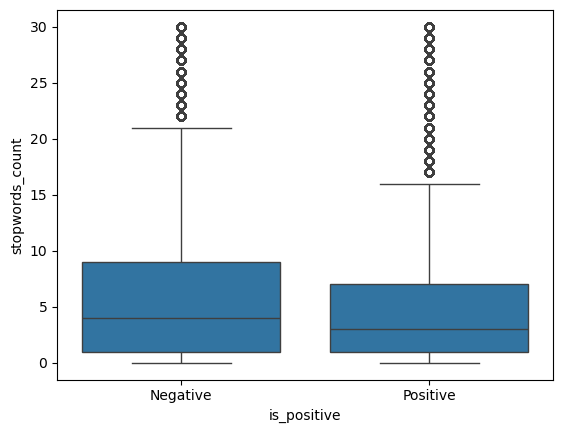

In [180]:
# boxplot for stopwords_count
df_trim = df[df['stopwords_count'] < df['stopwords_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='stopwords_count')

<Axes: xlabel='is_positive', ylabel='nonstopwords_count'>

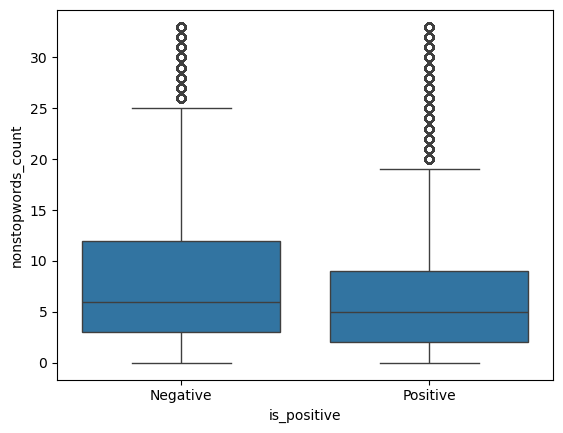

In [181]:
# boxplot for nonstopwords_count
df_trim = df[df['nonstopwords_count'] < df['nonstopwords_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='nonstopwords_count')

<Axes: xlabel='is_positive', ylabel='stopwords_ratio'>

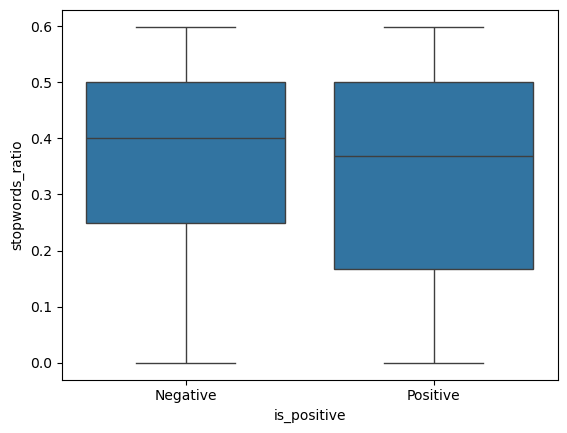

In [188]:
# boxplot for stopwords_ratio
df_trim = df[df['stopwords_ratio'] < df['stopwords_ratio'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='stopwords_ratio')

<Axes: title={'center': 'Sentiment Score of Reviews'}, xlabel='Sentiment Score', ylabel='Number of Reviews'>

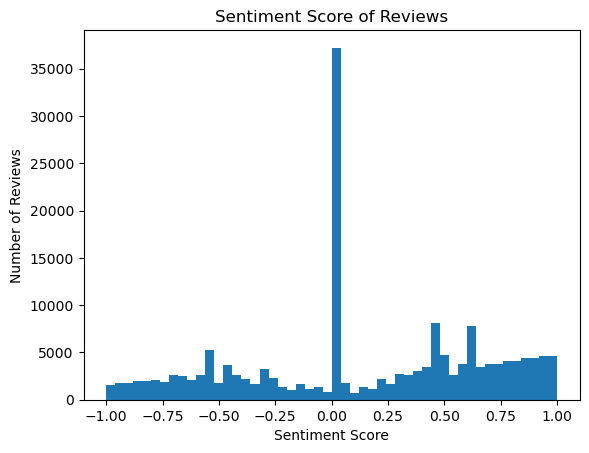

In [197]:
# histogram for sentiment_score
df['sentiment_score'].plot(kind='hist', bins=50, title='Sentiment Score of Reviews', xlabel='Sentiment Score', ylabel='Number of Reviews')

<Axes: xlabel='is_positive', ylabel='sentiment_score'>

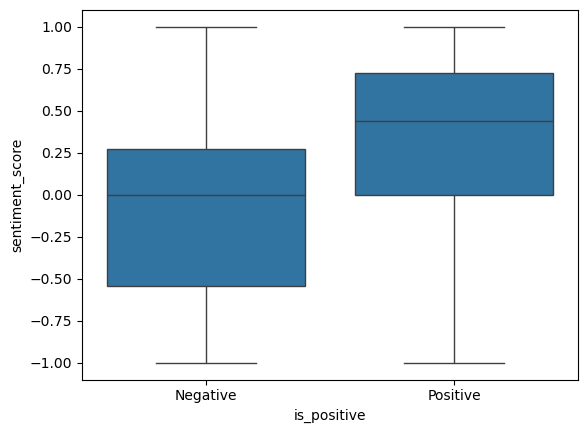

In [200]:
# boxplot for sentiment_score by is_positive
sns.boxplot(data=df, x='is_positive', y='sentiment_score')

<Axes: xlabel='word_count', ylabel='sentiment_score'>

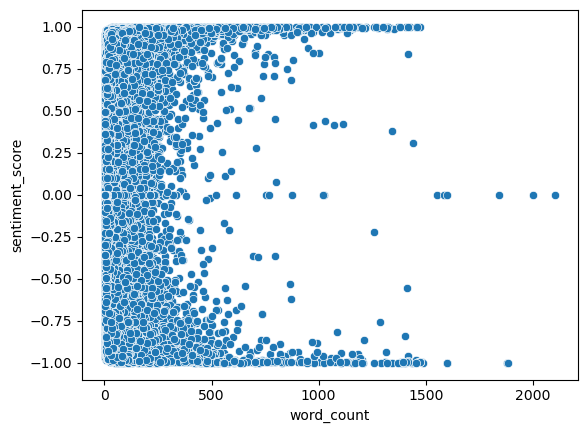

In [201]:
# scatterplot for sentiment_score and word_count
sns.scatterplot(x='word_count', y='sentiment_score', data=df)

<Axes: xlabel='word_bin', ylabel='sentiment_score'>

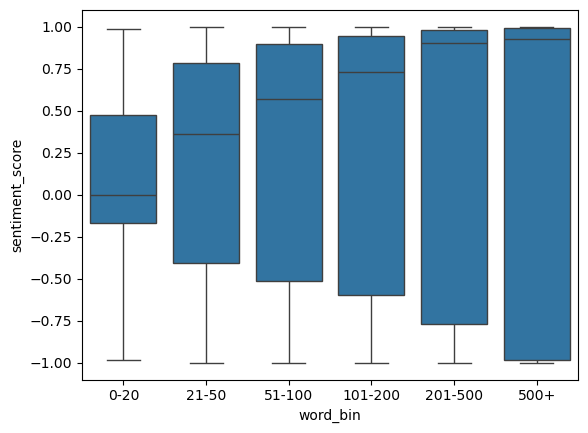

In [207]:
df['word_bin'] = pd.cut(df['word_count'],
                        bins=[0, 20, 50, 100, 200, 500, 2000],
                        labels=['0-20','21-50','51-100','101-200','201-500','500+'])
sns.boxplot(x='word_bin', y='sentiment_score', data=df)

<Axes: title={'center': 'Readability Index of Reviews'}, xlabel='Readability Index', ylabel='Number of Reviews'>

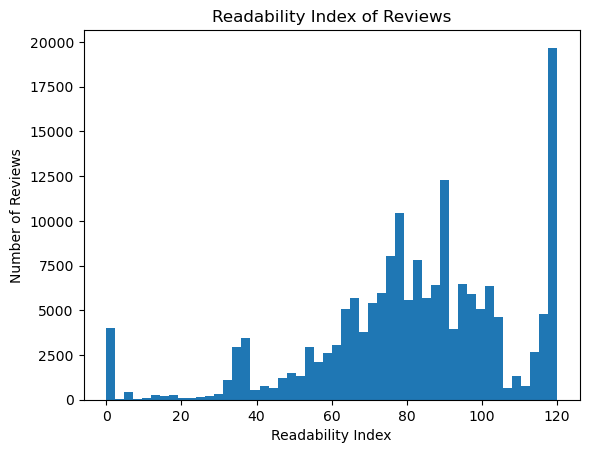

In [226]:
# histogram for readability_index
df['readability_index'].clip(0,120).plot(kind='hist', bins=50, title='Readability Index of Reviews', xlabel='Readability Index', ylabel='Number of Reviews')

<Axes: xlabel='is_positive', ylabel='readability_index'>

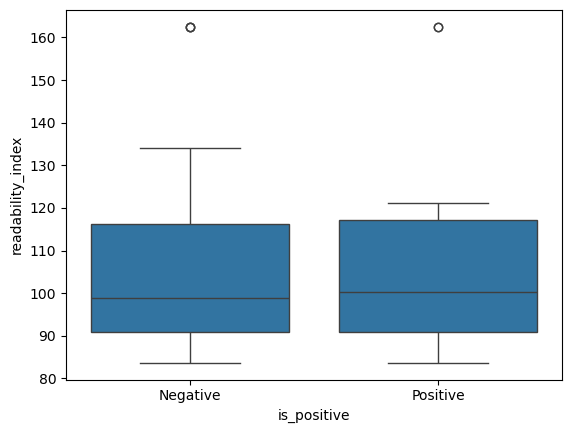

In [238]:
# boxplot for readability_index
df_trim = df[df['readability_index'] > df['readability_index'].quantile(0.50)]
sns.boxplot(data=df_trim, x='is_positive', y='readability_index')

<Axes: >

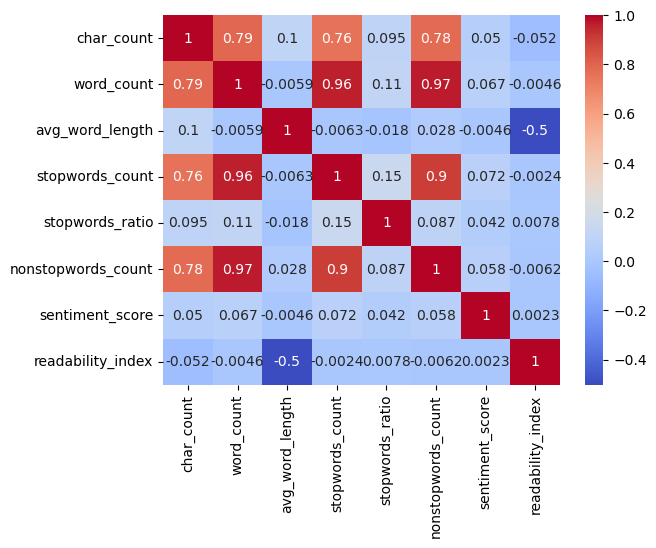

In [267]:
# correlation heatmap for numeric columns
corr_cols = ['char_count', 'word_count', 'avg_word_length', 'stopwords_count', 'stopwords_ratio', 'nonstopwords_count', 'sentiment_score', 'readability_index']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')

In [246]:
df.tail()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count,avg_word_length,stopwords_count,stopwords_ratio,nonstopwords_count,nonstopwords,sentiment_score,word_bin,readability_index
174865,This trash for sick anime clowns!,Negative,this trash for sick anime clowns!,this trash for sick anime clowns,"[this, trash, for, sick, anime, clowns]",33,6,4.666667,2,0.333333,4,"[trash, sick, anime, clowns]",-0.5562,0-20,102.045000
174866,Not noob friendly,Negative,not noob friendly,not noob friendly,"[not, noob, friendly]",17,3,5.000000,1,0.333333,2,"[noob, friendly]",-0.3570,0-20,90.990000
174867,Total trash for anime clowns!,Negative,total trash for anime clowns!,total trash for anime clowns,"[total, trash, for, anime, clowns]",29,5,5.000000,1,0.200000,4,"[total, trash, anime, clowns]",0.0000,0-20,83.320000
174868,Unplayable. It keeps trying to update but then...,Negative,unplayable. it keeps trying to update but then...,unplayable it keeps trying to update but then...,"[unplayable, it, keeps, trying, to, update, bu...",732,123,4.592308,61,0.495935,67,"[unplayable, keeps, trying, update, immediatel...",-0.3649,101-200,70.247688
174869,Bring back csgo,Negative,bring back csgo,bring back csgo,"[bring, back, csgo]",15,3,4.333333,0,0.000000,3,"[bring, back, csgo]",0.0000,0-20,90.990000


## Questions

<hr></hr>
1. <b>How do character and word count differ between positive and negative reviews?</b>

- Visualizing char_count for positive and negative reviews

<Axes: xlabel='is_positive', ylabel='char_count'>

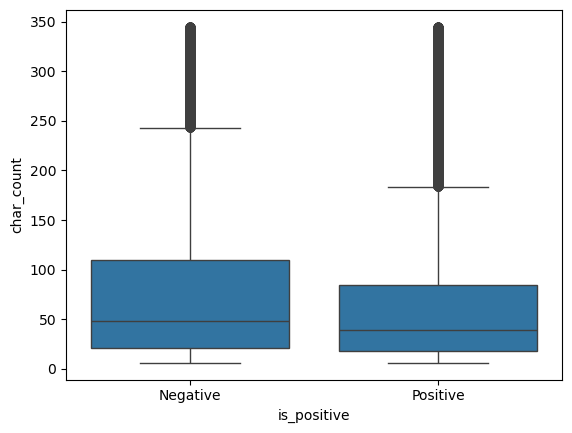

In [335]:
df_trim = df[df['char_count'] < df['char_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='char_count')

- Visualizing word_count for positive and negative reviews

<Axes: xlabel='is_positive', ylabel='word_count'>

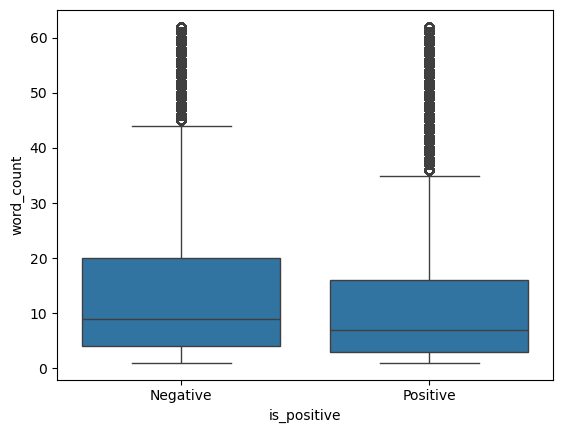

In [336]:
df_trim = df[df['word_count'] < df['word_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='word_count')

/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/923818048.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df[df.is_positive=='Positive'][df['char_count'] < 400]['char_count'], color='green', alpha=0.5)
/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/923818048.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df[df.is_positive=='Negative'][df['char_count'] < 400]['char_count'], color='red', alpha=0.5)
/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/923818048.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


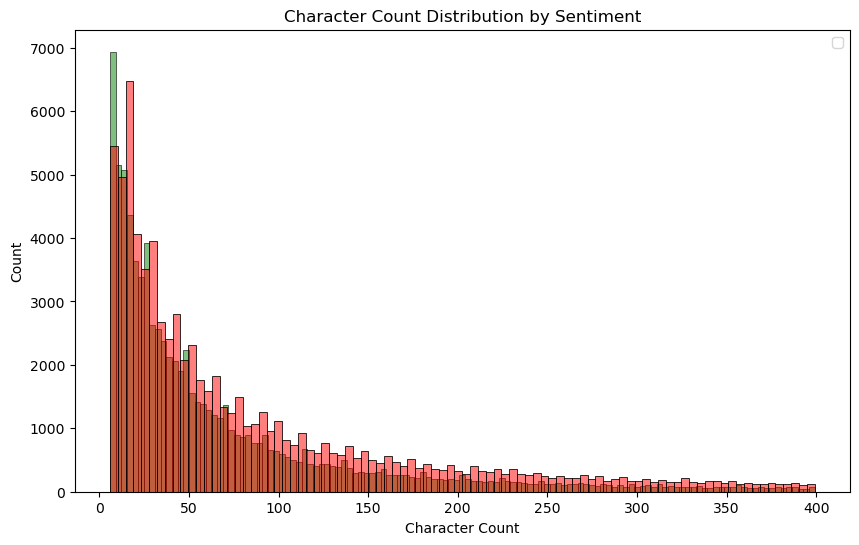

In [344]:
plt.figure(figsize=(10,6))

sns.histplot(df[df.is_positive=='Positive'][df['char_count'] < 400]['char_count'], color='green', alpha=0.5)
sns.histplot(df[df.is_positive=='Negative'][df['char_count'] < 400]['char_count'], color='red', alpha=0.5)

plt.title("Character Count Distribution by Sentiment")
plt.xlabel("Character Count")
plt.legend()
plt.show()

/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/3590762146.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df[df.is_positive=='Positive'][df['word_count'] < 100]['word_count'], color='green', label='Positive', alpha=0.5, bins=50)
/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/3590762146.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(df[df.is_positive=='Negative'][df['word_count'] < 100]['word_count'], color='red', label='Negative', alpha=0.5, bins=50)


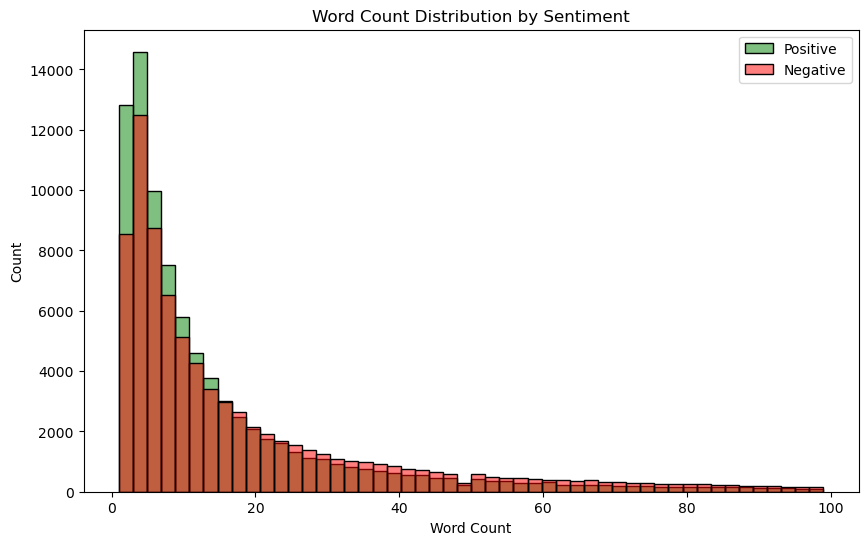

In [348]:
plt.figure(figsize=(10,6))

sns.histplot(df[df.is_positive=='Positive'][df['word_count'] < 100]['word_count'], color='green', label='Positive', alpha=0.5, bins=50)
sns.histplot(df[df.is_positive=='Negative'][df['word_count'] < 100]['word_count'], color='red', label='Negative', alpha=0.5, bins=50)

plt.title("Word Count Distribution by Sentiment")
plt.xlabel("Word Count")
plt.legend()
plt.show()

The visualizations for char_count and word_count display similar patterns. In the boxplots, the range for negative reviews is slightly larger than positive reviews, but for both char_count and word_count the boxplots are generally the same shape despite having different values. For the histograms, negative reviews had slightly higher counts than positive reviews for both char_count and word_count. Just as the boxplots, char_count and word_count had similar distributions. It can be determined that negative reviews have slightly more words, and therefore more characters, than positive reviews.

<hr></hr>
2. <b>How do writing patterns differ between positive and negative reviews? (content length, readability, complexity)</b>

- Visualizing word_count for positive and negative reviews

<Axes: xlabel='is_positive', ylabel='word_count'>

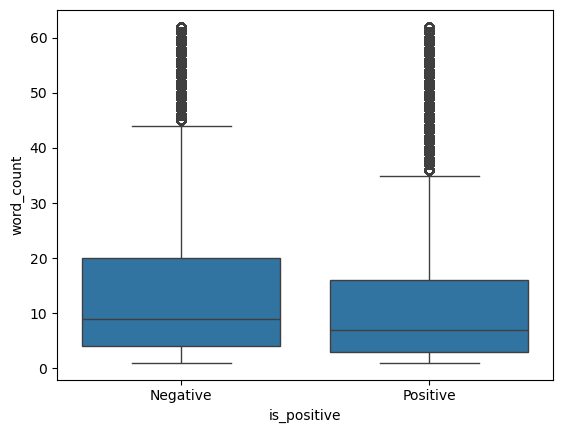

In [315]:
df_trim = df[df['word_count'] < df['word_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='word_count')

- Visualizing readability_index for positive and negative reviews

<Axes: xlabel='is_positive', ylabel='readability_index'>

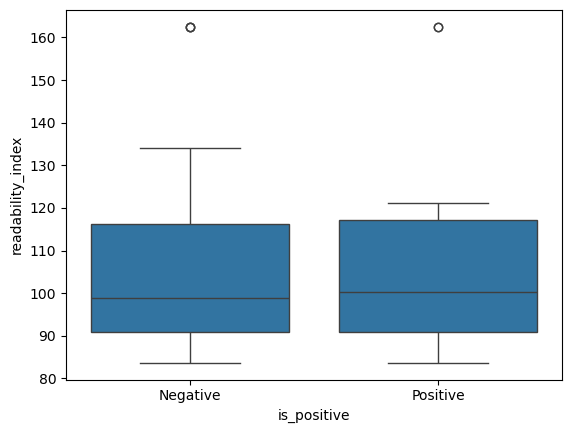

In [326]:
df_trim = df[df['readability_index'] > df['readability_index'].quantile(0.50)]
sns.boxplot(data=df_trim, x='is_positive', y='readability_index')

- Visualizing avg_word_length for positive and negative reviews

<Axes: xlabel='is_positive', ylabel='avg_word_length'>

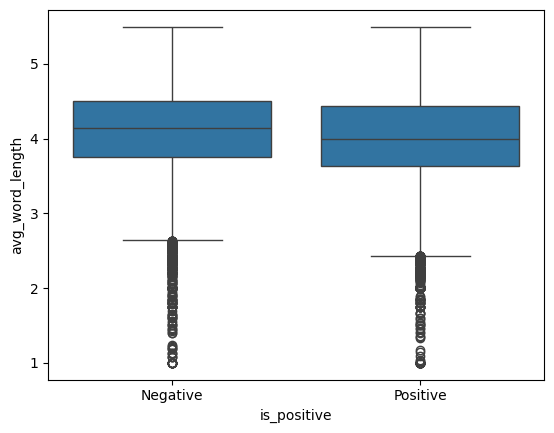

In [327]:
df_trim = df[df['avg_word_length'] < df['avg_word_length'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='avg_word_length')

<Axes: xlabel='is_positive', ylabel='stopwords_ratio'>

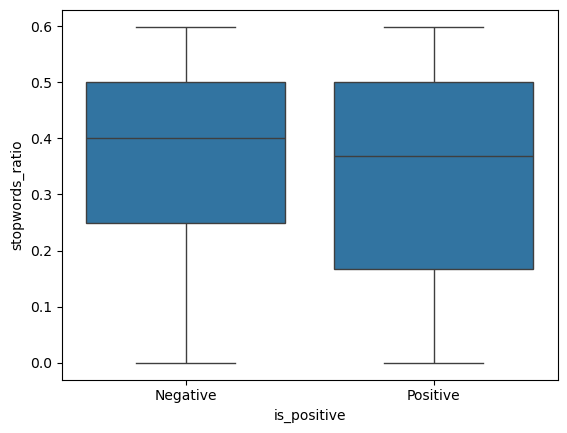

In [330]:
df_trim = df[df['stopwords_ratio'] < df['stopwords_ratio'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='stopwords_ratio')

<Axes: xlabel='is_positive', ylabel='nonstopwords_count'>

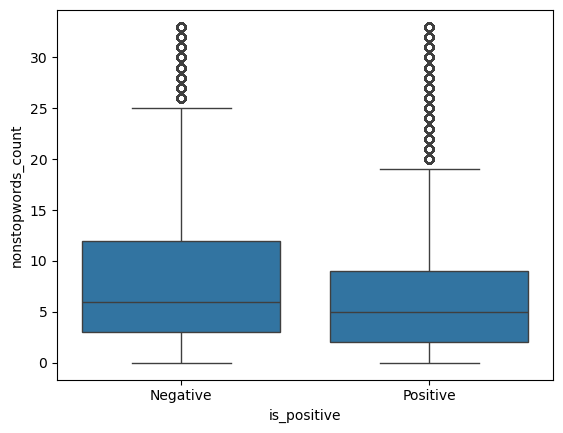

In [333]:
df_trim = df[df['nonstopwords_count'] < df['nonstopwords_count'].quantile(0.90)]
sns.boxplot(data=df_trim, x='is_positive', y='nonstopwords_count')

The features with the most differences in positive and negative reviews are word_count, stopwords_ratio, and nonstopwords_count. The ones with the least differences are readability_index and avg_word_length. This suggests that readability and average word length don't influence the sentiment labelling of reviews as strongly as word count and stopwords. Of all these features, stopwords ratio has the most significant difference, with positive reviews having a larger ratio than negative reviews. 

<hr></hr>
3. <b>Does review readability impact sentiment?</b>

- Correlation: Based on the correlation heatmap of numeric columns, readability_index and sentiment_score have a correlation of 0.0023. This is a relatively low correlation but it is a positive one. A positive correlation means that reviews that are more readable may be more likely to have a higher sentiment score, meaning that they may be more likely to be positive reviews. However, since the correlation is near 0, this may not be the case.

- Direct test: Visualize the features

<Axes: xlabel='readability_index', ylabel='sentiment_score'>

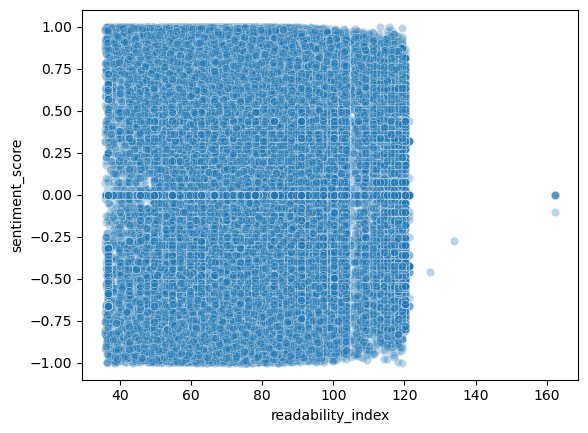

In [308]:
df_trim = df[df['readability_index'] > df['readability_index'].quantile(0.05)]
sns.scatterplot(data=df_trim, x='readability_index', y='sentiment_score', alpha=0.3)

<Axes: xlabel='readability_bin', ylabel='sentiment_score'>

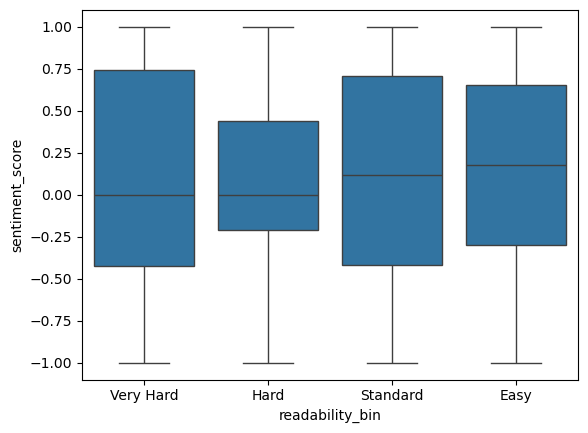

In [311]:
df['readability_bin'] = pd.cut(
    df['readability_index'],
    bins=[0, 30, 50, 70, 100],
    labels=['Very Hard', 'Hard', 'Standard', 'Easy']
)
sns.boxplot(x='readability_bin', y='sentiment_score', data=df)

/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/2663129431.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sent = df.groupby('readability_bin')['sentiment_score'].mean()


<Axes: title={'center': 'Mean Sentiment Score for Readability Bins'}, xlabel='Readability Bin', ylabel='Mean Sentiment Score'>

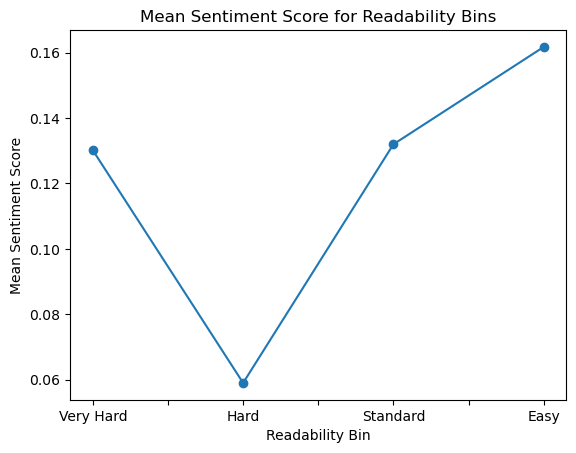

In [313]:
avg_sent = df.groupby('readability_bin')['sentiment_score'].mean()
avg_sent.plot(kind='line', marker='o', xlabel='Readability Bin', ylabel='Mean Sentiment Score', title='Mean Sentiment Score for Readability Bins')

Based on the visualizations, its evident that readability does not have an impact on sentiment score as the two do not have a clear and stable relationship. The plots in the scatterplot are crowded together on one side of the graph, making it difficult to identify a clear pattern between the two features. This is the case for the boxplots and the mean sentiment score, as the sentiment score decreases from Very Hard to Hard, but increases from Hard to Standard to Easy. Because there isn't a clearly identifiable pattern, it can be determined that readability does not have an impact on sentiment. 

<hr></hr>
4. <b>How does word count impact readibility?</b>

- Correlation: Based on the correlation heatmap of numeric columns, the correlation between word_count and readability_index is -0.0046. This is a relatively low correlation as well as a negative correlation since it's below 0. This may indicate that word_count and readability_index are related in a negative way, meaning that larger word counts could lead to lower readability indices.

- Direct test: Visualize the features

<Axes: xlabel='word_count', ylabel='readability_index'>

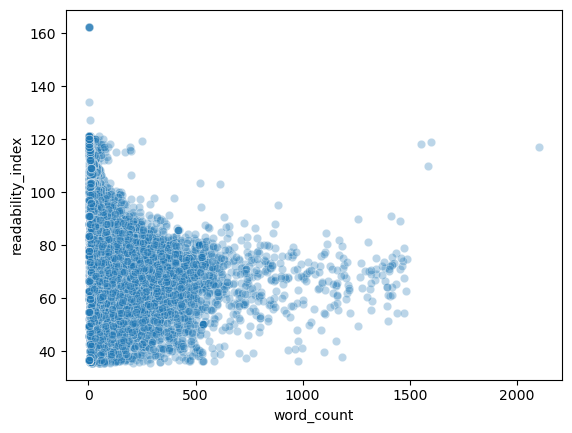

In [276]:
df_trim = df[df['readability_index'] > df['readability_index'].quantile(0.05)]
sns.scatterplot(data=df_trim, x='word_count', y='readability_index', alpha=0.3)

<Axes: xlabel='word_bin', ylabel='readability_index'>

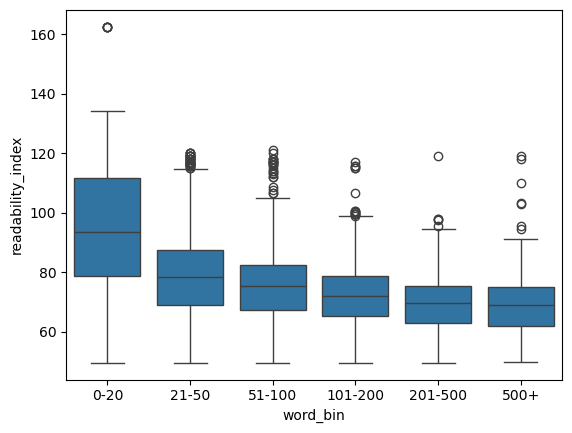

In [303]:
df_trim = df[df['readability_index'] > df['readability_index'].quantile(0.10)]
sns.boxplot(x='word_bin', y='readability_index', data=df_trim)

In [301]:
df.groupby('word_bin')['readability_index'].describe()

/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/1788834737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('word_bin')['readability_index'].describe()


,count,mean,std,min,25%,50%,75%,max
word_bin,,,,,,,,
0-20,123522.0,74.789242,1447.545199,-477022.780000,74.805000,90.990000,103.625000,162.505000
21-50,29081.0,75.921863,18.431273,-1290.103333,66.622143,77.412114,86.930000,120.205000
51-100,12425.0,70.069985,17.994096,-68.687692,63.486154,73.562632,81.579313,121.220000
101-200,6020.0,65.362308,24.667859,-209.329068,61.458636,70.572151,77.623372,117.160000
201-500,3160.0,51.781618,56.508794,-536.477066,52.999826,66.274996,73.861249,119.190000
500+,661.0,17.519557,244.243674,-2071.085714,55.446323,65.871477,73.590171,119.188096


/var/folders/79/g7tz5zbs6nd0kfgvkkzv24f00000gn/T/ipykernel_13076/2202792671.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_read = df.groupby('word_bin')['readability_index'].mean()


<Axes: title={'center': 'Mean Readability Index for Word Bins'}, xlabel='word_bin', ylabel='readability_index'>

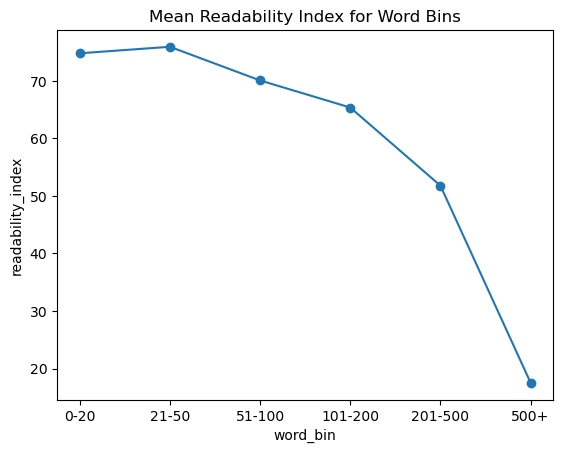

In [304]:
avg_read = df.groupby('word_bin')['readability_index'].mean()
avg_read.plot(kind='line', marker='o', xlabel='word_bin', ylabel='readability_index', title='Mean Readability Index for Word Bins')

Based on the visualizations, it appears that word_count and readability_index have a negative relationship. In the scatterplot, there are more plots for higher readability index when the word count is lower, and less plots when the word count increses. The box plot displays word count separated into bins, and both the ranges and range sizes of the readability indices decrease as word count increases. The readability index does not reach 90 after the word count is greater than 20. The line plot displays the mean readability indices of each word bin, and the mean values decrease as the word count increases. Since word count and readability index have an evident negative relationship, it can be determined that word count does impact readability

<hr></hr>
5. <b>Which impacts sentiment score the most: stopwords or non-stopwords?</b>

- Correlation: Based on the correlation heatmap of numeric columns, the correlation of stopwords_count, stopwords_ratio, and nonstopwords_count to sentiment_score is 0.072, 0.042, and 0.058, respectively. Though the values are relatively low, stopwords_count seems to have a slightly higher correlation with sentiment_score compared to the others. This indicates that there might be some sort of impact.

- Direct test: Get sentiment scores of text with and without stopwords

In [247]:
df['no_stopwords_content'] = df['tokens'].apply(lambda x: " ".join([w for w in x if w not in stop]))
df['sentiment_no_stopwords'] = df['no_stopwords_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [279]:
df.tail()

,content,is_positive,clean_content,clean_no_punct,tokens,char_count,word_count,avg_word_length,stopwords_count,stopwords_ratio,nonstopwords_count,nonstopwords,sentiment_score,word_bin,readability_index,no_stopwords_content,sentiment_no_stopwords
174865,This trash for sick anime clowns!,Negative,this trash for sick anime clowns!,this trash for sick anime clowns,"[this, trash, for, sick, anime, clowns]",33,6,4.666667,2,0.333333,4,"[trash, sick, anime, clowns]",-0.5562,0-20,102.045000,trash sick anime clowns,-0.5106
174866,Not noob friendly,Negative,not noob friendly,not noob friendly,"[not, noob, friendly]",17,3,5.000000,1,0.333333,2,"[noob, friendly]",-0.3570,0-20,90.990000,noob friendly,0.4588
174867,Total trash for anime clowns!,Negative,total trash for anime clowns!,total trash for anime clowns,"[total, trash, for, anime, clowns]",29,5,5.000000,1,0.200000,4,"[total, trash, anime, clowns]",0.0000,0-20,83.320000,total trash anime clowns,0.0000
174868,Unplayable. It keeps trying to update but then...,Negative,unplayable. it keeps trying to update but then...,unplayable it keeps trying to update but then...,"[unplayable, it, keeps, trying, to, update, bu...",732,123,4.592308,61,0.495935,67,"[unplayable, keeps, trying, update, immediatel...",-0.3649,101-200,70.247688,unplayable keeps trying update immediately sto...,-0.0931
174869,Bring back csgo,Negative,bring back csgo,bring back csgo,"[bring, back, csgo]",15,3,4.333333,0,0.000000,3,"[bring, back, csgo]",0.0000,0-20,90.990000,bring back csgo,0.0000


In [249]:
df[['sentiment_score', 'sentiment_no_stopwords']].corr()

,sentiment_score,sentiment_no_stopwords
sentiment_score,1.00000,0.90927
sentiment_no_stopwords,0.90927,1.00000


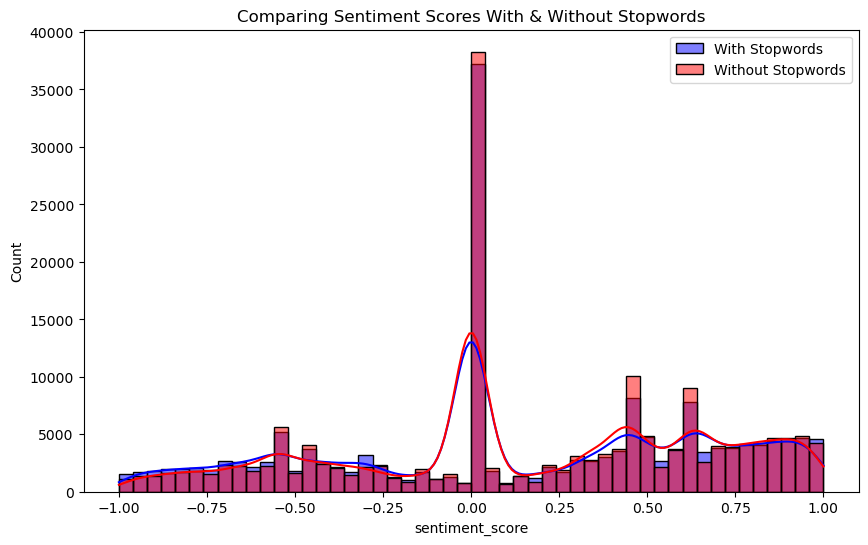

In [265]:
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment_score'], bins=50, kde=True, color='blue', label='With Stopwords', alpha=0.5)
sns.histplot(df['sentiment_no_stopwords'], bins=50, kde=True, color='red', label='Without Stopwords', alpha=0.5)
plt.title("Comparing Sentiment Scores With & Without Stopwords")
plt.legend()
plt.show()

<Axes: >

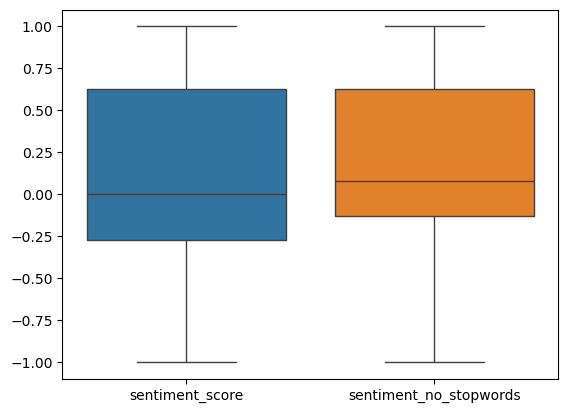

In [253]:
sns.boxplot(data=df[['sentiment_score', 'sentiment_no_stopwords']])

Based on the overlaid histogram and the side-by-side boxplots, it appears that the sentiment scores without stopwords are slightly more positive than the sentiment scores with stopwords. This can be determined by observing how more red appears on the positive side of sentiment scores in the histogram, and how sentiment_no_stopwords has a slightly smaller range that stretches less into the negative side of sentiment scores in the side-by-side boxplots. While the difference is only slight, its evident that stopwords do have somewhat of an impact on sentiment score, if not a strong one.

<Axes: >

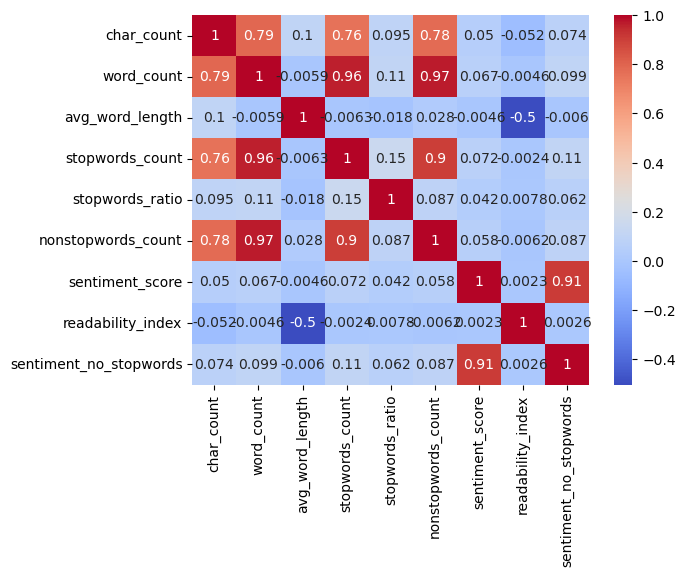

In [268]:
# Updated correlation heatmap for numeric columns
corr_cols = ['char_count', 'word_count', 'avg_word_length', 'stopwords_count', 'stopwords_ratio', 'nonstopwords_count', 'sentiment_score', 'readability_index', 'sentiment_no_stopwords']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')

## Future Work

Although this project provided meaningful insight into the relationship between writing patterns and sentiment, there is still plenty of room for deeper exploration. Sentiment change over time could be observed to identify and examine how writing patterns and linguistic features change as the experiences of gamers change over time. Additionally, examining how game updates or patches impacts user feedback may provide additional insight in how writing patterns are affected by these kind of changes. More feature engineering would allow reviews to be analyzed and explore more deeply. For example, identifying emotional tones such as anger or sarcasm could help in classifying sentiment more accurately as well as providing insight into which linguistic features contribute to these tones. Comparing these writing patterns and linguistic features by game genre or category could also provide insight in how reviews and their writing characteristics differ according to the content of the games.

## Conclusion

This project examined the writing patterns of Steam game reviews to understand how textual and linguistic features relate to positive and negative sentiment. Through data cleaning, feature engineering, and exploratory analysis, it was found that negative reviews tend to be longer and more detailed as well as more linguistically complex, which results in lower readability scores. In contrast, positive reviews are typically short and more direct. Overall, this analysis demonstrates that review sentiment is related to and impacted by writing behavior and linguistic styles. By performing this analysis, a clearer understanding of how gamers express their emotions and opinions was gained.

## Sources

Link to Kaggle Dataset: https://www.kaggle.com/datasets/filipkin/steam-reviews?select=output.csv